# Postwork 6: Visualización de Datos Avanzada

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
pip install --upgrade plotly

In [3]:
df = pd.read_csv('/content/COVID-19 Survey Student Responses-clean.csv', index_col=0)
df.head()

,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,Emotional connections,What you miss the most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0.0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1.0,4,Remain Constant,NO,Social Media,NO,NO,Travelling


## Treemaps

In [4]:
df_treemap =df[['Medium for online class','Rating of Online Class experience']]
df_treemap.head()

,Medium for online class,Rating of Online Class experience
0,Laptop/Desktop,Good
1,Smartphone,Excellent
2,Laptop/Desktop,Very poor
3,Smartphone,Very poor
4,Laptop/Desktop,Good


In [5]:
df_treemap['count']=1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
fig = px.treemap(df_treemap, path=['Medium for online class', 'Rating of Online Class experience'], 
                 values='count')
fig.show()

In [7]:
df_treemap2 =df[['Prefered social media platform','Change in your weight']]
df_treemap2.head()

,Prefered social media platform,Change in your weight
0,Linkedin,Increased
1,Youtube,Decreased
2,Linkedin,Remain Constant
3,Instagram,Decreased
4,Instagram,Remain Constant


In [8]:
df_treemap2['count']=1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
fig = px.treemap(df_treemap2, path=['Change in your weight','Prefered social media platform' ], 
                 values='count')
fig.show()

## Scatterplots

Analizamos varias columnas de datos mediante gráficas de dispersión.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



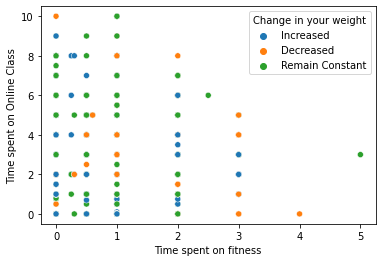

In [11]:
sns.scatterplot(df['Time spent on fitness'], df['Time spent on Online Class'], hue=df['Change in your weight']);

Parece que los estudiantes que bajan de peso realizan arriba de media hora de ejercicio al día, y los que suben suelen estar debajo de uno. Los que permanecen constantes hacen en su mayoría de 0-2 horas de ejercicio al día.

Examinemos lo que más extrañan los estudiantes

In [12]:
counts = df['What you miss the most'].value_counts() 
counts[counts>5]

School/college           379
Friends , relatives      223
Travelling               183
Roaming around freely    149
Eating outside           104
Colleagues                67
Nothing                   11
ALL                        9
All                        9
Name: What you miss the most, dtype: int64

In [13]:
df_miss= df[df['What you miss the most'].isin(counts.index[:5])]

Basándonos en esto veamos cuánto tiempo pasan durmiendo. 

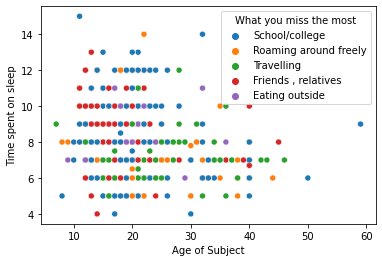

In [14]:
sns.scatterplot(x=df_miss['Age of Subject'],y=df_miss['Time spent on sleep'], hue=df_miss['What you miss the most']);

Podemos entonces generar un scatterplot con variables condicionantes para ayudarnos+ a visualizar mejor los resultados.

In [15]:
df_school = df[df['What you miss the most']=='School/college']
df_roam = df[df['What you miss the most']=='Roaming around freely']
df_travel = df[df['What you miss the most']=='Travelling']
df_friends = df[df['What you miss the most']=='Friends , relatives']
df_eat = df[df['What you miss the most']=='Eating outside']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

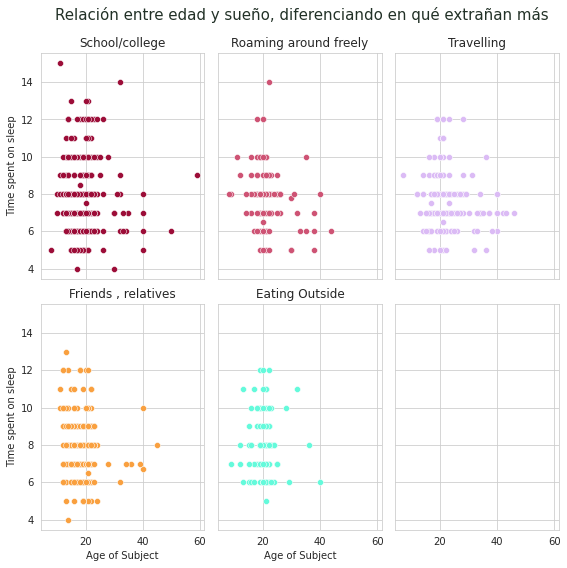

In [16]:
sns.set_style('whitegrid')
palette = ["#223127","#9c0d38","#ce5374","#dbbbf5","#F9A03F", "#64FADB"]

fig = plt.figure(figsize=(8, 8))
axes = fig.subplots(2, 3, sharex=True, sharey=True)

sns.scatterplot(df_school['Age of Subject'], df_school['Time spent on sleep'], ax=axes[0, 0], color=palette[1])
sns.scatterplot(df_roam['Age of Subject'], df_roam['Time spent on sleep'], ax=axes[0, 1], color=palette[2])
sns.scatterplot(df_travel['Age of Subject'], df_travel['Time spent on sleep'], ax=axes[0, 2], color=palette[3])
sns.scatterplot(df_friends['Age of Subject'], df_friends['Time spent on sleep'], ax=axes[1, 0], color=palette[4]);
sns.scatterplot(df_eat['Age of Subject'], df_eat['Time spent on sleep'], ax=axes[1, 1], color=palette[5]);

axes[0, 0].set_title('School/college')
axes[0, 1].set_title('Roaming around freely')
axes[0, 2].set_title('Travelling')
axes[1, 0].set_title('Friends , relatives')
axes[1, 1].set_title('Eating Outside')

fig.suptitle('Relación entre edad y sueño, diferenciando en qué extrañan más', fontsize=15, c=palette[0], x=0.53)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

Observamos que en la gente mayor es más común extrañar viajar y la escuela. En la gente que extraña viajar se ve que hay más gente que duerme 7 horas. Curiosamente la gente que más extraña salir libremente son los que duermen un poco menos

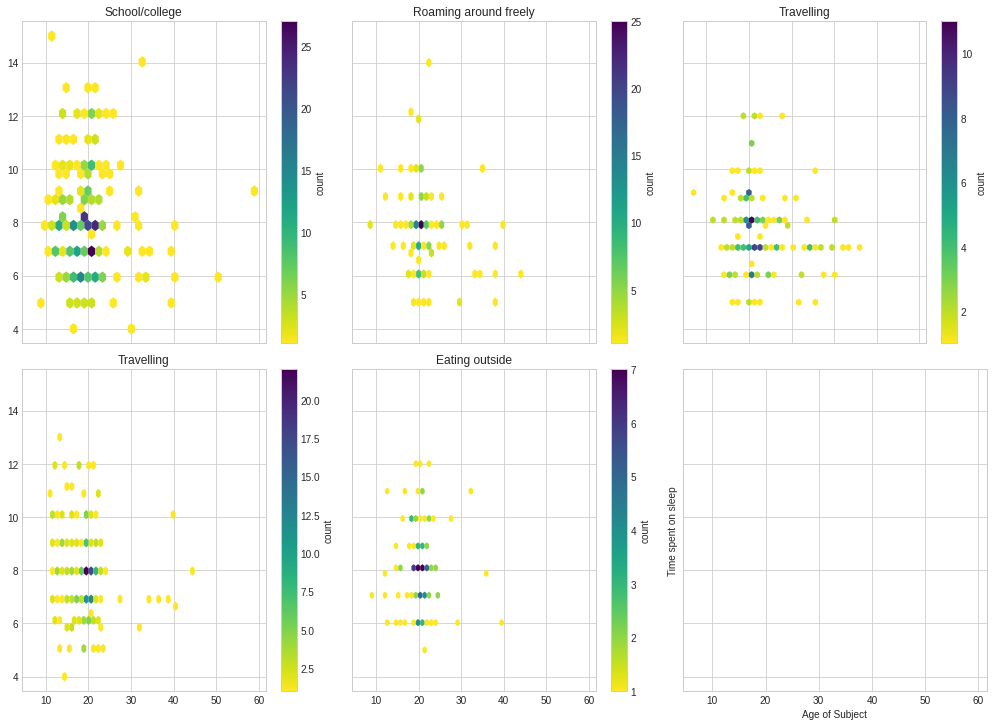

In [17]:
plt.style.use("seaborn-whitegrid")

fig = plt.figure(figsize=(14, 10))
((ax0, ax1, ax2), (ax3, ax4, ax5)) = fig.subplots(2,3, sharex=True, sharey=True)

c = ax0.hexbin(df_school['Age of Subject'], df_school['Time spent on sleep'], gridsize=30, cmap='viridis_r',
               mincnt=1, edgecolors="none")
ax0.set_title("School/college")
cb = fig.colorbar(c, ax=ax0)
cb.set_label('count')

c = ax1.hexbin(df_roam['Age of Subject'], df_roam['Time spent on sleep'], gridsize=30, cmap='viridis_r',
               mincnt=1, edgecolors="none")
ax1.set_title("Roaming around freely")
cb = fig.colorbar(c, ax=ax1)
cb.set_label('count')

c = ax2.hexbin(df_travel['Age of Subject'], df_travel['Time spent on sleep'], gridsize=30, cmap='viridis_r',
               mincnt=1, edgecolors="none")
ax2.set_title("Travelling")
cb = fig.colorbar(c, ax=ax2)
cb.set_label('count')

c = ax3.hexbin(df_friends['Age of Subject'], df_friends['Time spent on sleep'], gridsize=30, cmap='viridis_r',
               mincnt=1, edgecolors="none")
ax3.set_title("Travelling")
cb = fig.colorbar(c, ax=ax3)
cb.set_label('count')

c = ax4.hexbin(df_eat['Age of Subject'], df_eat['Time spent on sleep'], gridsize=30, cmap='viridis_r',
               mincnt=1, edgecolors="none")
ax4.set_title("Eating outside")
cb = fig.colorbar(c, ax=ax4)
cb.set_label('count')

fig.tight_layout()
plt.xlabel('Age of Subject')
plt.ylabel('Time spent on sleep')
plt.show()

Aunque la mayoría de la gente se concentra en los 20 años, hay varios cerca de los 40 que extraña viajar. En todas las categorías vemos que sobresalen los jóvenes de 20 años que duermen 8 horas.

Ahora analicemos las redes sociales.

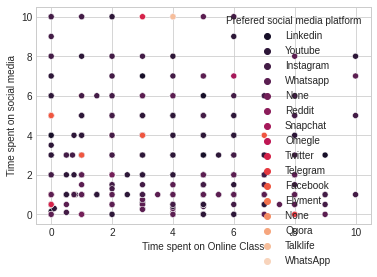

In [18]:
sns.scatterplot(x=df['Time spent on Online Class'],y=df['Time spent on social media'], hue=df['Prefered social media platform'], palette="rocket");

Podemos observar que WhatsApp se repite pero los encuestados escribieron de forma diferente sus respuestas. Procedamos a solucionarlo y visualicemos las 4 redes sociales preferidas por los alumnos.

In [19]:
df['Prefered social media platform'] = df['Prefered social media platform'].str.replace('Whatsapp','WhatsApp')

Ahora hacemos un conteo de los usuarios por cada red social para seleccionar las más utilizadas por la población muestra.

In [20]:
df['Prefered social media platform'].value_counts()

Instagram    352
WhatsApp     337
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
None          17
Snapchat       8
Reddit         5
Telegram       3
Talklife       1
Quora          1
Elyment        1
None           1
Omegle         1
Name: Prefered social media platform, dtype: int64

El conteo nos indica que las tres plataformas que se distinguen notoriamente del resto son Instagram, YouTube y WhatsApp.

In [21]:
df_social_media = df[df['Prefered social media platform'].isin(['Instagram','WhatsApp','Youtube'])]

La siguiente gráfica parece sugerir que WhatsApp se emplea en todo el rango de edades del set de datos y que el tiempo que los usuarios pasan en esta red suele ser de entre 0 y 2 horas. Es conveniente hacer nuestro análisis por separado para las plataformas.

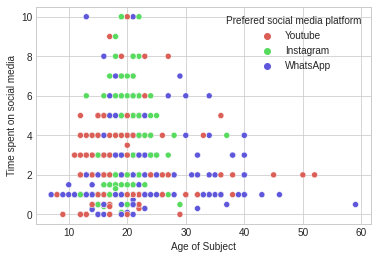

In [22]:
sns.scatterplot(x=df_social_media['Age of Subject'],y=df_social_media['Time spent on social media'], hue=df_social_media['Prefered social media platform'], palette="hls");

In [23]:
df_yout = df[df['Prefered social media platform']=='Youtube']
df_insta = df[df['Prefered social media platform']=='Instagram']
df_whats = df[df['Prefered social media platform']=='WhatsApp']

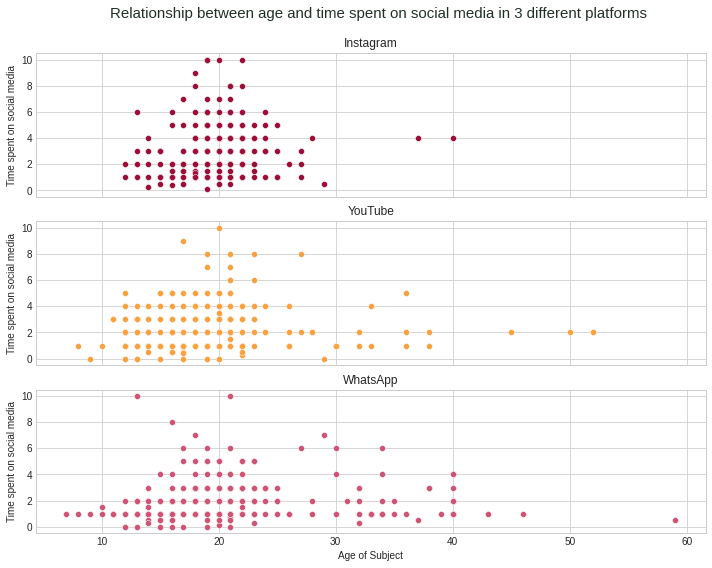

In [24]:
palette = ["#223127","#9c0d38","#F9A03F","#ce5374"]

fig = plt.figure(figsize=(10, 8))
axes = fig.subplots(3, sharex=True, sharey=True)

sns.scatterplot(x=df_insta['Age of Subject'], y=df_insta['Time spent on social media'], ax=axes[0], color=palette[1])
sns.scatterplot(x=df_yout['Age of Subject'], y=df_yout['Time spent on social media'], ax=axes[1], color=palette[2])
sns.scatterplot(x=df_whats['Age of Subject'], y=df_whats['Time spent on social media'], ax=axes[2], color=palette[3]);

axes[0].set_title('Instagram')
axes[1].set_title('YouTube')
axes[2].set_title('WhatsApp')

fig.suptitle('Relationship between age and time spent on social media in 3 different platforms', fontsize=15, c=palette[0], x=0.53)

plt.tight_layout()
plt.subplots_adjust(top=0.9)



*   El tiempo que los usuarios pasan en redes sociales disminuye conforme a su edad.
*   Los usuarios pasan una menor cantidad de horas en WhatsApp en contraste con Facebook e Instagram.
*   El sector de usuarios que prefiere Instagram se encuentra muy bien delimitado entre los 10 y 30 años.
*   Los usuarios de entre 15 y 20 años pasan muchas más horas en Instagram o Youtube que el resto.





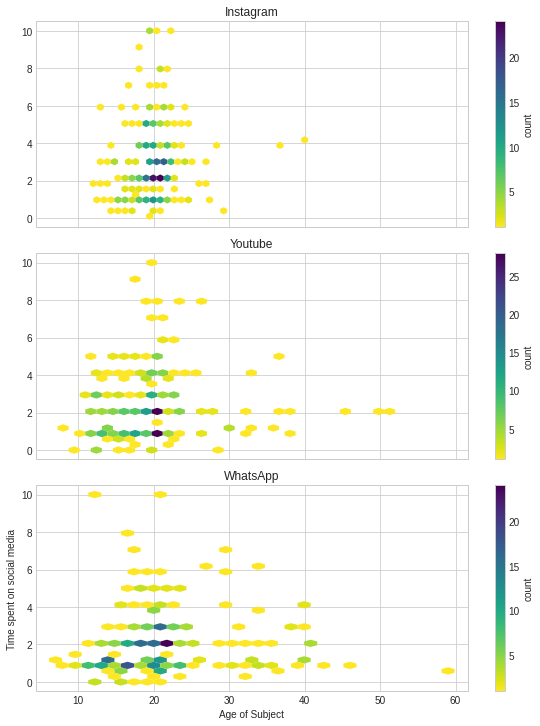

In [25]:
plt.style.use("seaborn-whitegrid")

fig = plt.figure(figsize=(8, 10))
(ax0, ax1, ax2) = fig.subplots(3,1, sharex=True, sharey=True)

c = ax0.hexbin(df_insta['Age of Subject'], df_insta['Time spent on social media'], gridsize=30, cmap='viridis_r',
               mincnt=1, edgecolors="none")
ax0.set_title("Instagram")
cb = fig.colorbar(c, ax=ax0)
cb.set_label('count')

c = ax1.hexbin(df_yout['Age of Subject'], df_yout['Time spent on social media'], gridsize=30, cmap='viridis_r',
               mincnt=1, edgecolors="none")
ax1.set_title("Youtube")
cb = fig.colorbar(c, ax=ax1)
cb.set_label('count')

c = ax2.hexbin(df_whats['Age of Subject'], df_whats['Time spent on social media'], gridsize=30, cmap='viridis_r',
               mincnt=1, edgecolors="none")
ax2.set_title("WhatsApp")
cb = fig.colorbar(c, ax=ax2)
cb.set_label('count')

fig.tight_layout()
plt.xlabel('Age of Subject')
plt.ylabel('Time spent on social media')
plt.show()

## Gráfica de barras apiladas

Examinemos a la gente respecto a la pérdida de peso

In [26]:
value_counts_all = df['Change in your weight'].value_counts()

value_counts_all

Remain Constant    535
Increased          438
Decreased          209
Name: Change in your weight, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



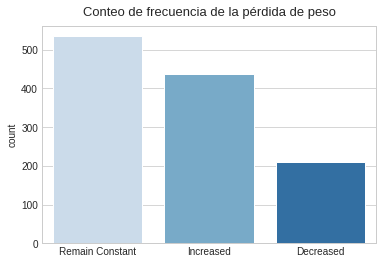

In [27]:
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(value_counts_all.index, value_counts_all, ax=ax, palette='Blues');

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia de la pérdida de peso', fontsize=13, pad=10);

Conectemos esto a cómo se ha sentido la gente respecto a si se sienten más  conectados con familia y amigos durante la pandemia

In [28]:
df_mini = df[['Change in your weight', 'Emotional connections']].copy()
df_mini.head()

,Change in your weight,Emotional connections
0,Increased,YES
1,Decreased,NO
2,Remain Constant,YES
3,Decreased,NO
4,Remain Constant,NO


In [29]:
df_mini['count'] = 1
df_mini.head()

,Change in your weight,Emotional connections,count
0,Increased,YES,1
1,Decreased,NO,1
2,Remain Constant,YES,1
3,Decreased,NO,1
4,Remain Constant,NO,1


In [30]:
value_counts = df_mini.groupby(['Change in your weight', 'Emotional connections'])['count'].sum()

value_counts

Change in your weight  Emotional connections
Decreased              NO                        65
                       YES                      144
Increased              NO                       119
                       YES                      319
Remain Constant        NO                       167
                       YES                      368
Name: count, dtype: int64

In [31]:
value_counts = value_counts.unstack(1)

value_counts

Emotional connections,NO,YES
Change in your weight,,
Decreased,65,144
Increased,119,319
Remain Constant,167,368


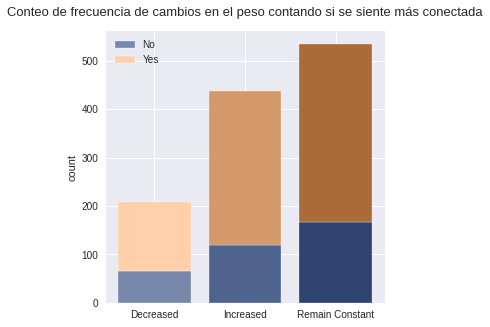

In [32]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts['NO'], label='NO',
              color=["#7788AA","#4E638E","#2E4372","#152A55"])
plt2 = ax.bar(value_counts.index, value_counts['YES'], bottom=value_counts['NO'],
              color=["#FFD0AA", "#D4996A", "#AA6B39", "#804415"])

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia de cambios en el peso contando si se siente más conectada', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('No', 'Yes'));

Vemos que hay mucha más gente que sí se siente más conectada a sus conocidos. Y de quienes han bajado de peso, hay más gente que siente eso respecto a los que no. 

In [33]:
df_connected = df.groupby(['Rating of Online Class experience','Emotional connections'])['Time spent on self study'].mean()
df_connected

Rating of Online Class experience  Emotional connections
Average                            NO                       3.104545
                                   YES                      2.827798
Excellent                          NO                       2.676471
                                   YES                      3.280247
Good                               NO                       3.056818
                                   YES                      2.814516
No rating                          NO                       4.285714
                                   YES                      2.676471
Poor                               NO                       3.900000
                                   YES                      3.050000
Very poor                          NO                       2.641104
                                   YES                      2.966000
Name: Time spent on self study, dtype: float64

In [34]:
value_counts = df_connected.unstack(1)
value_counts = value_counts.fillna(0)
#value_counts['Sum']=value_counts['NO']+value_counts['YES']
value_counts = value_counts.sort_values(by='NO', ascending=False)

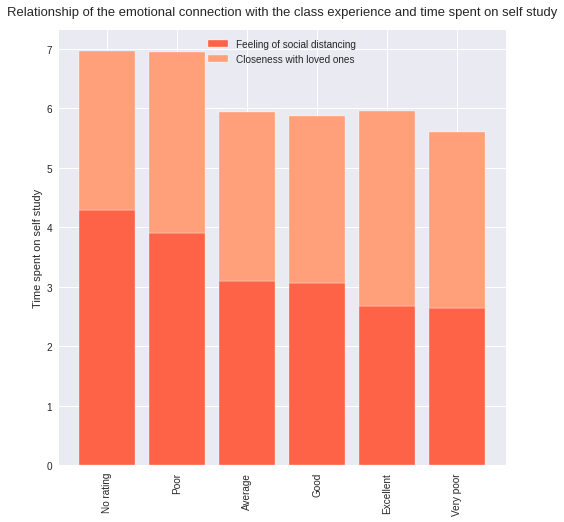

In [35]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts['NO'],
              color='tomato')
plt2 = ax.bar(value_counts.index, value_counts['YES'], bottom= value_counts['NO'],
              color='lightsalmon')

ax.set_ylabel('Time spent on self study')
ax.set_title('Relationship of the emotional connection with the class experience and time spent on self study', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]),('Feeling of social distancing','Closeness with loved ones'), loc='upper center');
plt.xticks(rotation=90);
#ax.set_ylim(0, 4500);

Aquellos que dedican más tiempo al autoestudio y tienen una mala experiencia con las clases online se sienten más distanciados de sus seres queridos. Recordemos que todos aquellos en la categoría 'No rating' no cuentan con un dispositivo para tomar clases en línea; esto cuenta como una mala experiencia.

Podríamos inferir que el motivo por el que la categoría 'Very poor' tiene menor distanciamiento social es porque prefiere ignorar las clases y estudiar por su cuenta, de esta forma puede pasar más tiempo con sus seres queridos.